# Bayesian Linear Regression in Python

In [3]:
import numpy as np
np.bool = np.bool_
from numpy.random import uniform, normal, poisson, binomial
from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Generate example data
np.random.seed(42)  # Set seed for reproducibility

In [ ]:
normal([10,20], 1)

In [ ]:
# generate simulation data
n_sample = 100
a = 0.5
b = 10
sd = 5

x = uniform(0, 100, size=n_sample)
mu = a * x + b # linear predictor is a * x + b, link function is y=x
y = normal(mu, sd) # Probability distribution is normal distribution

In [ ]:
x

In [ ]:
mu

In [ ]:
y

In [ ]:
plt.scatter(x, y, s=10, alpha=0.9, label='data')
plt.ylim(0,80)
plt.legend()

In [ ]:
np.random.rand(10, 1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 임의의 데이터 생성
np.random.seed(0)
#X = 2 * np.random.rand(100, 1)  # 주택의 면적
X = uniform(1000, 3000, size=n_sample)
#Y = 4 + 3 * X + np.random.randn(100, 1)  # 주택의 가격
Y = 2 * X + uniform(500, 1000, size=n_sample)  # 주택의 가격

# 데이터 시각화
plt.scatter(X, Y)
plt.xlabel('House Area')
plt.ylabel('House Price')
plt.title('House Price vs. House Area')
plt.show()

In [ ]:
import arviz as az

In [ ]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [ ]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");

In [ ]:
import pymc as pm

print(f"Running on PyMC v{pm.__version__}")

In [ ]:
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import xarray as xr

from pymc import HalfCauchy, Model, Normal, sample

print(f"Running on PyMC v{pm.__version__}")

In [ ]:
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

In [ ]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + rng.normal(scale=0.5, size=size)

data = pd.DataFrame(dict(x=x, y=y))

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x, y, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
plt.legend(loc=0);

In [ ]:
with Model() as model:  # model specifications in PyMC are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy("sigma", beta=10)
    intercept = Normal("Intercept", 0, sigma=20)
    slope = Normal("slope", 0, sigma=20)

    # Define likelihood
    likelihood = Normal("y", mu=intercept + slope * x, sigma=sigma, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    idata = sample(3000)

In [ ]:
az.plot_trace(idata, figsize=(10, 7));

In [ ]:
_, ax = plt.subplots(figsize=(7, 7))
az.plot_lm(idata=idata, y="y", num_samples=100, axes=ax, y_model="y_model")
ax.set_title("Posterior predictive regression lines")
ax.set_xlabel("x");

In [ ]:
import sys

try:
    import bambi as bmb
except ImportError:
    !{sys.executable} -m pip install -q --upgrade bambi
    import bambi as bmb

In [ ]:
model = bmb.Model("y ~ x", data)
idata = model.fit(draws=3000)

In [ ]:
idata.posterior["y_model"] = idata.posterior["Intercept"] + idata.posterior["x"] * xr.DataArray(x)

In [ ]:
_, ax = plt.subplots(figsize=(7, 7))
az.plot_lm(idata=idata, y="y", num_samples=1000, axes=ax, y_model="y_model")
ax.set_title("Posterior predictive regression lines")
ax.set_xlabel("x");

In [29]:
# Import packages
import warnings
import pandas as pd
import numpy as np

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn import datasets
# Generate data
x, y = datasets.make_regression(n_samples=100,
                                n_features=1,
                                noise=10)

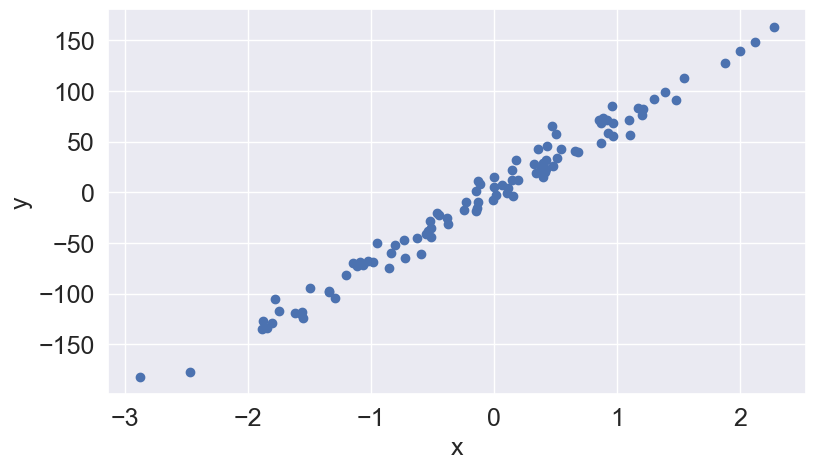

In [30]:
# Plot data
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(x, y)
ax.ticklabel_format(style='plain')
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

/var/folders/8c/3nykxypj32j_z4l0d64bln480000gp/T/ipykernel_72377/494252651.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_vals = np.arange(min(x), max(x), 0.1)


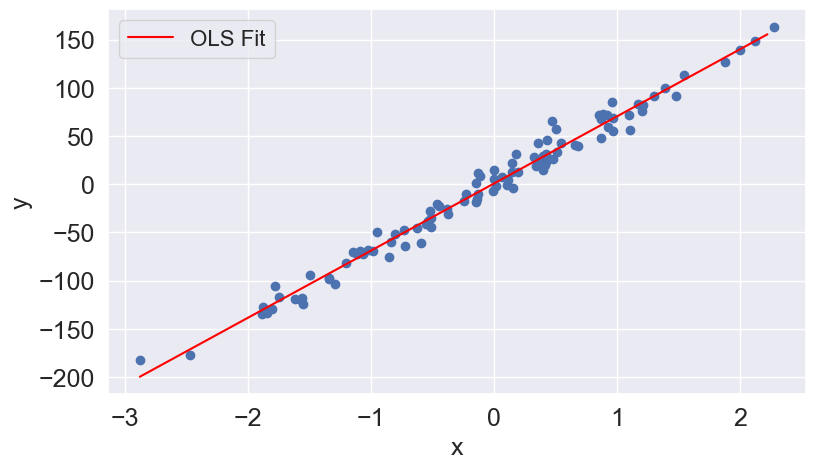

In [31]:
# Packages
import statsmodels.formula.api as smf
# Create a dataframe
data = pd.DataFrame(list(zip(x.flatten(), y)), columns =['x', 'y'])
# Calculating the slope and intercept
formula = 'y ~ x'
results = smf.ols(formula, data=data).fit()
# Get our equation of the OLS line
intercept = results.params['Intercept']
slope = results.params['x']
x_vals = np.arange(min(x), max(x), 0.1)
ols_line = slope*x_vals + intercept
# Plot the OLS line
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(data['x'], data['y'])
ax.plot(x_vals, ols_line,label='OLS Fit', color='red')
ax.ticklabel_format(style='plain')
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16)
plt.show()

In [32]:
intercept

0.8809527049598542

In [33]:
slope

69.69843971555555

In [34]:
def make_uninformative_prior(name,data):
    """Function to make priors."""
    df = pd.DataFrame({name:data})
    #df['Probability'] = 1/len(data)
    df['Prior'] = 1/len(data)
    return df
# Create a range of values for the slope
data_slope = np.linspace(results.params['x']*0.8,
                         results.params['x']*1.2, num=30)
prior_slope = make_uninformative_prior('slope',data_slope)
prior_slope.head()

,slope,Prior
0,55.758752,0.033333
1,56.720110,0.033333
2,57.681467,0.033333
3,58.642825,0.033333
4,59.604183,0.033333


In [35]:
data_slope

array([55.75875177, 56.72010956, 57.68146735, 58.64282514, 59.60418293,
       60.56554072, 61.52689851, 62.4882563 , 63.44961409, 64.41097188,
       65.37232966, 66.33368745, 67.29504524, 68.25640303, 69.21776082,
       70.17911861, 71.1404764 , 72.10183419, 73.06319198, 74.02454977,
       74.98590756, 75.94726535, 76.90862313, 77.86998092, 78.83133871,
       79.7926965 , 80.75405429, 81.71541208, 82.67676987, 83.63812766])

In [36]:
# Create a range of values for the intercept
data_inter = np.linspace(results.params['Intercept']*0.8,
                         results.params['Intercept']*1.2, num=30)
prior_inter = make_uninformative_prior('intercept',data_inter)
prior_inter.head()

,intercept,Prior
0,0.704762,0.033333
1,0.716913,0.033333
2,0.729064,0.033333
3,0.741215,0.033333
4,0.753366,0.033333


In [37]:
# Create a range of values for the sigma
data_sigma = np.linspace(results.resid.std()*0.8,
                         results.resid.std()*1.2, num=30)
prior_sigma = make_uninformative_prior('sigma',data_sigma)
prior_sigma.head()

,sigma,Prior
0,7.965860,0.033333
1,8.103203,0.033333
2,8.240545,0.033333
3,8.377888,0.033333
4,8.515230,0.033333


In [38]:
# Counter for the row index
counter = 0
# Dataframe to store the combinations in
df = pd.DataFrame(columns=['slope','intercept','sigma','prior'])
# Iterate through the slope
for slope in prior_slope['slope']:
    prob_slope = prior_slope['Prior'].loc[prior_slope['slope'] == slope]
    
    # Iterate through the intercept
    for intercept in prior_inter['intercept']:
        prob_inter = prior_inter['Prior'].loc[prior_inter['intercept'] == intercept]
        
        # Iterate through the error
        for sigma in prior_sigma['sigma']:
            prob_sigma = prior_sigma['Prior'].loc[prior_sigma['sigma'] == sigma]
            
            # Calculate the prior of this specific combination
            prob = float(prob_slope)*float(prob_inter)*float(prob_sigma)

            # Insert the row of data
            df.loc[counter] = [slope] + [intercept] + [sigma] + [prob]
            
            # Update row index
            counter += 1

In [39]:
df

,slope,intercept,sigma,prior
0,55.758752,0.704762,7.965860,0.000037
1,55.758752,0.704762,8.103203,0.000037
2,55.758752,0.704762,8.240545,0.000037
3,55.758752,0.704762,8.377888,0.000037
4,55.758752,0.704762,8.515230,0.000037
...,...,...,...,...
26995,83.638128,1.057143,11.399421,0.000037
26996,83.638128,1.057143,11.536763,0.000037
26997,83.638128,1.057143,11.674106,0.000037
26998,83.638128,1.057143,11.811448,0.000037


In [40]:
counter = 0
df['likelihood'] = df['prior']

# Loop over the combination of values
for slope in prior_slope['slope']:
    for intercept in prior_inter['intercept']:        
        for sigma in prior_sigma['sigma']:
            
            # Compute the predictions from this line
            predictions = slope * data['x'] + intercept
            
            # Compute residual/errors of this line
            residuals = data['y'] - predictions
            
            # Compute the likelihood function
            likelihoods = norm(0, sigma).pdf(residuals)
            
            # Compute the total likelihood
            df['likelihood'].loc[counter] = likelihoods.prod()
            counter += 1

In [44]:
residuals

0     -0.985524
1    -25.668164
2      8.293652
3      9.049581
4    -10.657430
        ...    
95    -5.435776
96    12.447821
97   -14.980869
98   -11.632154
99    20.060462
Length: 100, dtype: float64

In [47]:
likelihoods.prod()

5.557783497460178e-196

In [41]:
df

,slope,intercept,sigma,prior,likelihood
0,55.758752,0.704762,7.965860,0.000037,6.868932e-238
1,55.758752,0.704762,8.103203,0.000037,4.957534e-235
2,55.758752,0.704762,8.240545,0.000037,2.441102e-232
3,55.758752,0.704762,8.377888,0.000037,8.414877e-230
4,55.758752,0.704762,8.515230,0.000037,2.079414e-227
...,...,...,...,...,...
26995,83.638128,1.057143,11.399421,0.000037,1.227890e-198
26996,83.638128,1.057143,11.536763,0.000037,6.414860e-198
26997,83.638128,1.057143,11.674106,0.000037,3.075591e-197
26998,83.638128,1.057143,11.811448,0.000037,1.359091e-196


In [50]:
# Computing and normalising the posterior
df['posterior'] = df['prior'] * df['likelihood']
df['posterior2'] = df['posterior']/df['posterior'].sum()
df

,slope,intercept,sigma,prior,likelihood,posterior,posterior2
0,55.758752,0.704762,7.965860,0.000037,6.868932e-238,2.544049e-242,1.201723e-79
1,55.758752,0.704762,8.103203,0.000037,4.957534e-235,1.836124e-239,8.673228e-77
2,55.758752,0.704762,8.240545,0.000037,2.441102e-232,9.041117e-237,4.270718e-74
3,55.758752,0.704762,8.377888,0.000037,8.414877e-230,3.116621e-234,1.472186e-71
4,55.758752,0.704762,8.515230,0.000037,2.079414e-227,7.701533e-232,3.637944e-69
...,...,...,...,...,...,...,...
26995,83.638128,1.057143,11.399421,0.000037,1.227890e-198,4.547740e-203,2.148199e-40
26996,83.638128,1.057143,11.536763,0.000037,6.414860e-198,2.375874e-202,1.122283e-39
26997,83.638128,1.057143,11.674106,0.000037,3.075591e-197,1.139108e-201,5.380760e-39
26998,83.638128,1.057143,11.811448,0.000037,1.359091e-196,5.033669e-201,2.377735e-38


In [51]:
# Get the marginal probability
slope_df = df.groupby('slope').sum()

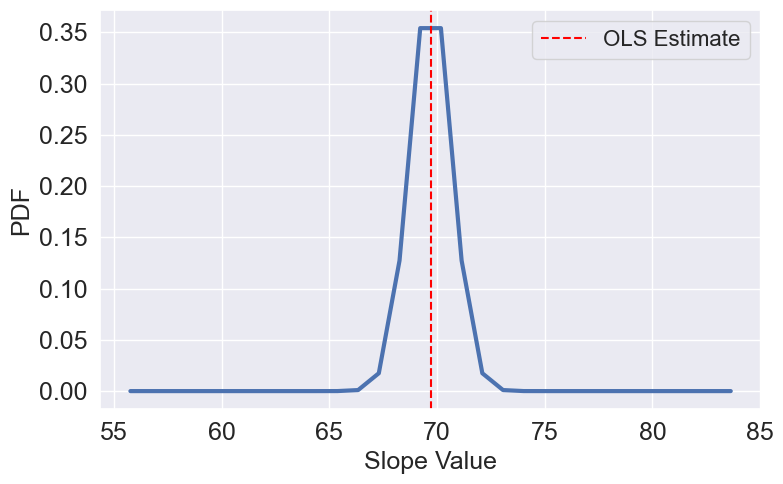

In [56]:
# Plot the posterior distribution of the slope
plt.figure(figsize=(8,5))
plt.plot(slope_df.index, slope_df.posterior2, linewidth=3)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Slope Value', fontsize=18)
plt.ylabel('PDF', fontsize=18)
plt.axvline(results.params['x'], color='red', ls='--', label='OLS Estimate')
plt.legend(fontsize=16)
plt.tight_layout()
#plt.savefig('c.png')
plt.show()

In [57]:
# Get the marginal probability
intercept_df = df.groupby('intercept').sum()

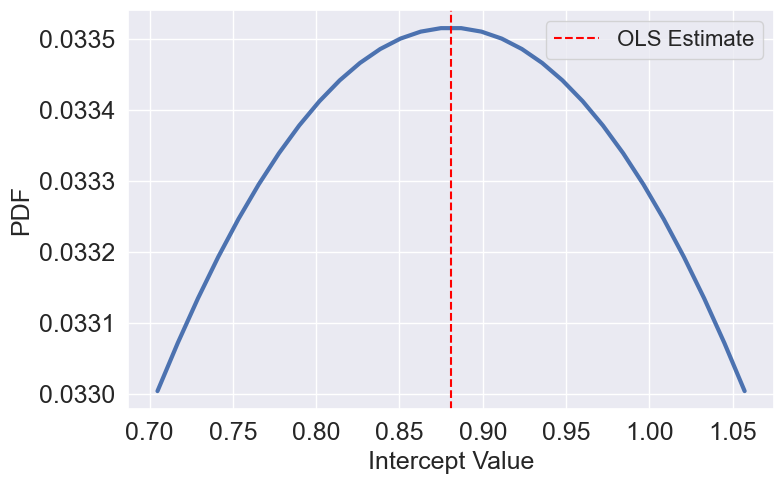

In [58]:

# Plot the posterior distribution of the slope
plt.figure(figsize=(8,5))
plt.plot(intercept_df.index, intercept_df.posterior2, linewidth=3)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Intercept Value', fontsize=18)
plt.ylabel('PDF', fontsize=18)
plt.axvline(results.params['Intercept'], color='red', ls='--', label='OLS Estimate')
plt.legend(fontsize=16)
plt.tight_layout()
#plt.savefig('c.png')
plt.show()

In [59]:
# Get the marginal probability
sigma_df = df.groupby('sigma').sum()

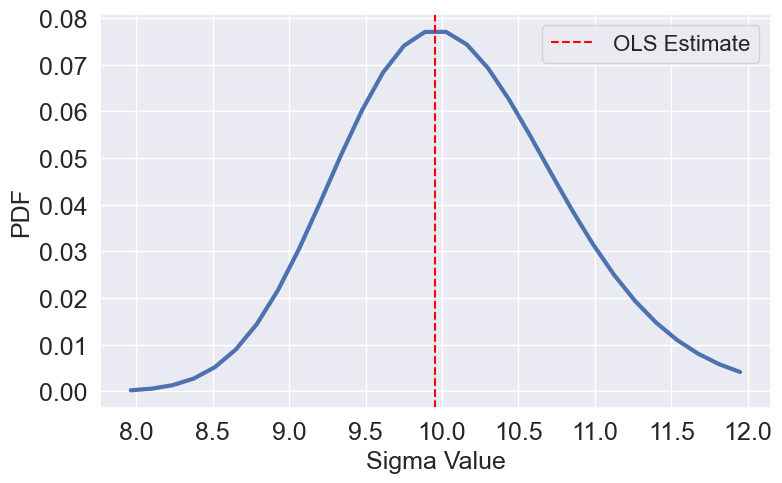

In [60]:
# Plot the posterior distribution of the slope
plt.figure(figsize=(8,5))
plt.plot(sigma_df.index, sigma_df.posterior2, linewidth=3)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Sigma Value', fontsize=18)
plt.ylabel('PDF', fontsize=18)
plt.axvline(results.resid.std(), color='red', ls='--', label='OLS Estimate')
plt.legend(fontsize=16)
plt.tight_layout()
#plt.savefig('d.png')
plt.show()